Project Title: Understanding Global Happiness 2019: A Data Analysis Project By Wendel Burlat

Project Description:

Overview:
This data analysis project aims to explore and understand the factors influencing global happiness. Using the World Happiness Report dataset, we will investigate the relationships between various socio-economic, environmental, and cultural factors and the happiness levels of different countries or regions. The goal is to gain insights into what contributes to happiness on a global scale and provide meaningful recommendations based on our findings.


In [1]:
from google.colab import files
uploades = files.upload()

Saving 2019.csv to 2019.csv


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("2019.csv")

# Display the first few rows of the dataset
print("Sample data:")
print(data.head())

# Get basic information about the dataset
print("\nDataset Information:")
print(data.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
categorical_columns = data.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}")

# Correlation matrix for numerical columns
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix)

Sample data:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2   

<ipython-input-2-b2ec6e318e19>:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Descriptive Analysis: We will perform descriptive statistics to summarize the data and generate initial insights into happiness scores, distribution, and trends over time.

Descriptive analysis is essential for gaining a preliminary understanding of your dataset.

In [3]:
happiness_scores_stats = data['Score'].describe()
print("Summary Statistics for Happiness Scores:")
print(happiness_scores_stats)

Summary Statistics for Happiness Scores:
count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64


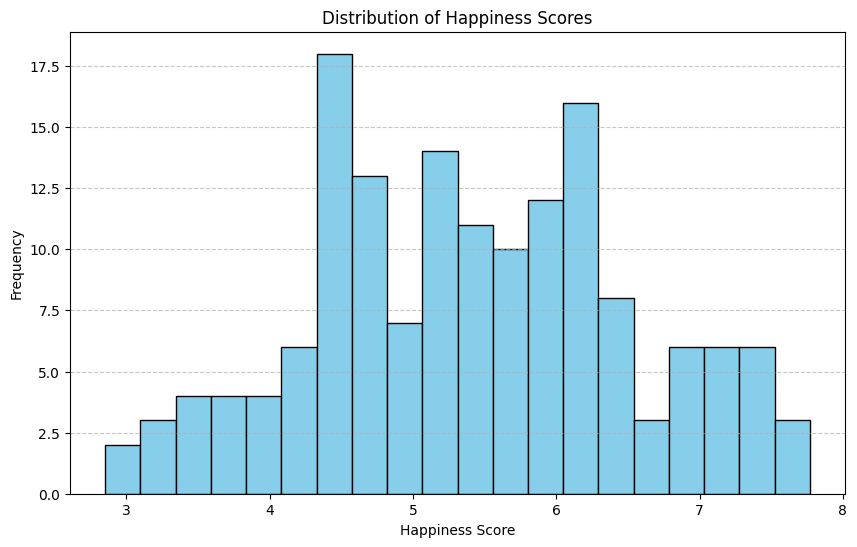

In [5]:
# Histogram of Happiness Scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Correlation Analysis: We will analyze the relationships between happiness scores and various factors such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

In [8]:
import seaborn as sns

In [9]:
selected_columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [10]:
correlation_matrix = data[selected_columns].corr()

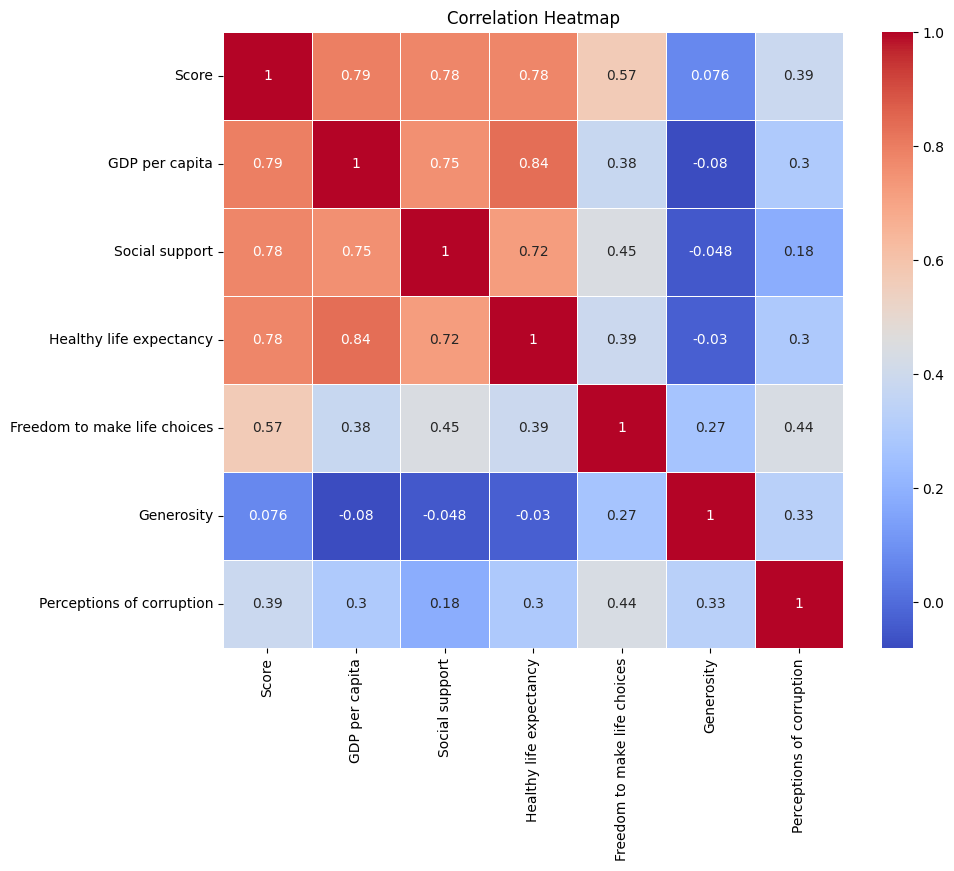

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
import plotly.express as px

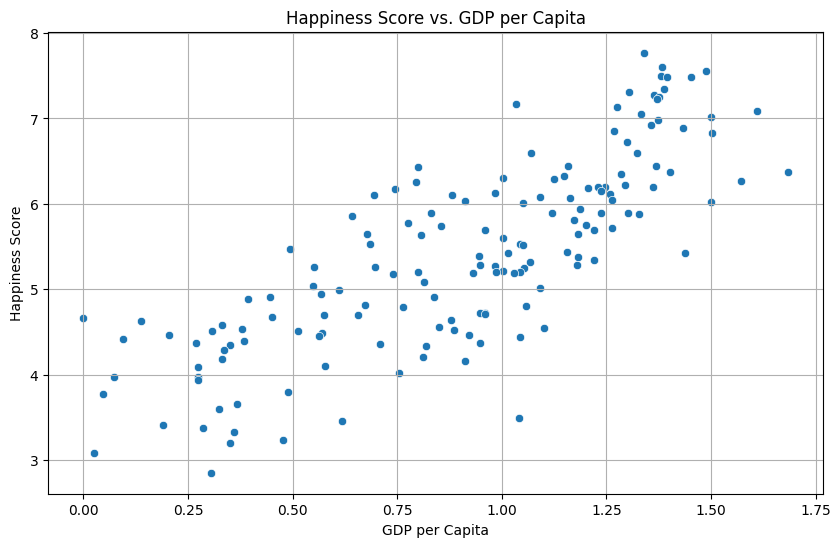

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Score', data=data)
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.grid()
plt.show()

In [16]:

# Heatmap: Correlation Heatmap (as shown in the previous response)
# Code for creating a correlation heatmap can be reused from the previous response.

# Geographic Map: Happiness Score by Country
fig = px.choropleth(data,
                    locations='Country or region',
                    locationmode='country names',
                    color='Score',
                    hover_name='Country or region',
                    title='Happiness Score by Country',
                    color_continuous_scale='Viridis')
fig.update_geos(projection_type="natural earth")
fig.show()

Predictive Modeling: We will explore the possibility of building predictive models to estimate happiness scores based on selected features. Machine learning algorithms such as regression and decision trees may be employed for this purpose.

Building predictive models to estimate happiness scores based on selected features is a valuable data analysis task

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
# Select features (independent variables) and target (dependent variable)
X = data[['GDP per capita', 'Social support', 'Healthy life expectancy',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = data['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict happiness scores for a new set of features (input values)
new_features = np.array([[1.5, 1.6, 1.0, 0.8, 0.2, 0.1]])  # Replace with your own values
predicted_score = model.predict(new_features)
print("Predicted Happiness Score:", predicted_score[0])

Mean Squared Error: 0.4144641383528352
R-squared: 0.6017537913445683
Predicted Happiness Score: 7.1974210733652715


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



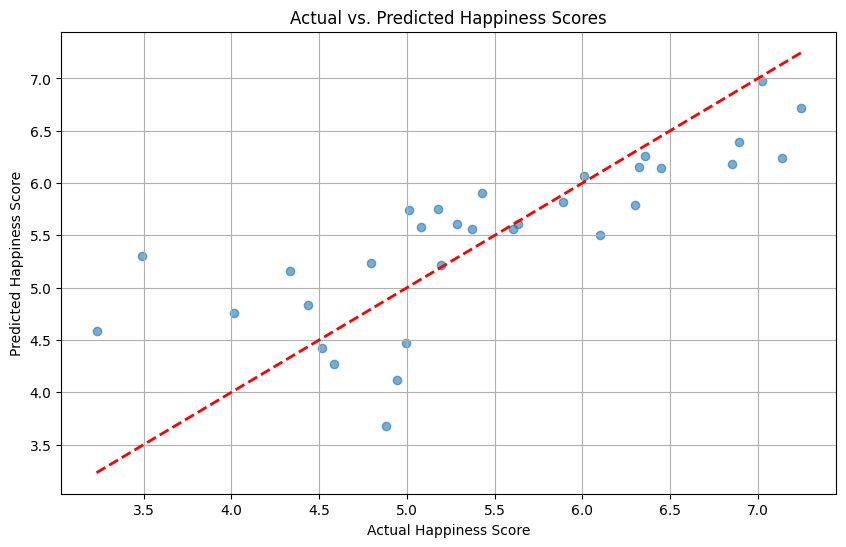

In [19]:
# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs. Predicted Happiness Scores')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.grid()
plt.show()

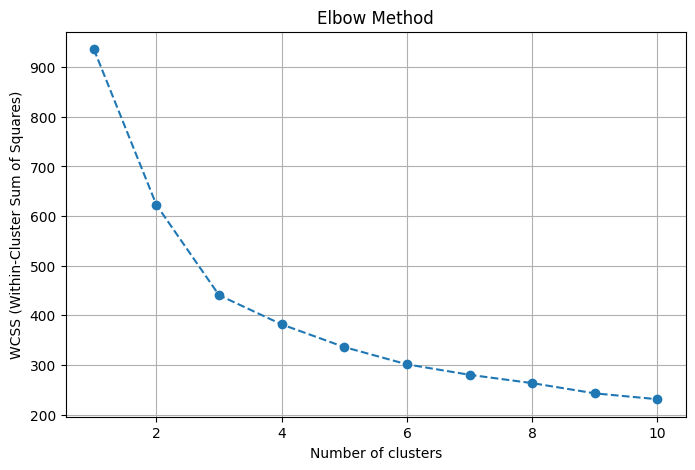

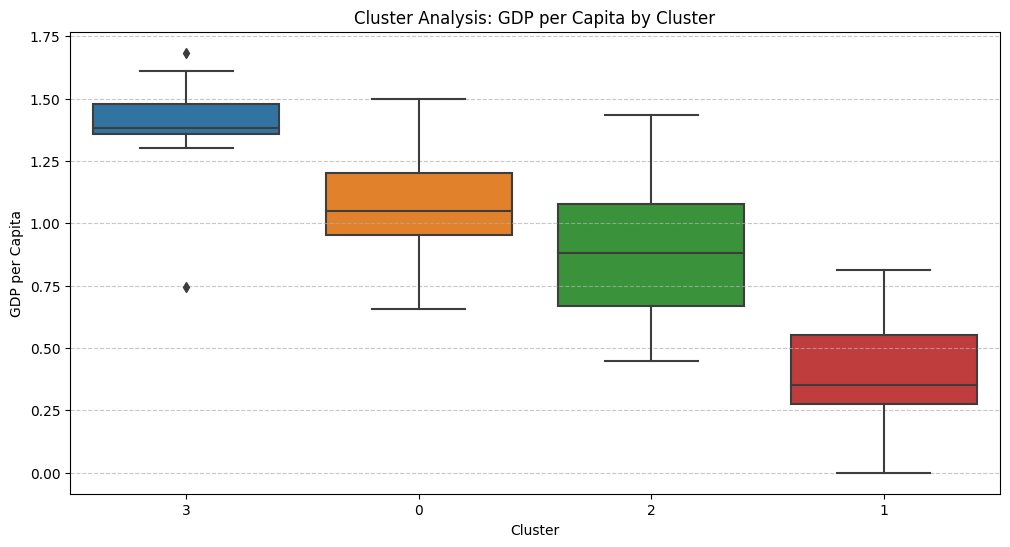

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset


# Select features for clustering (you can choose the relevant ones)
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

# Based on the Elbow Method, choose an appropriate number of clusters (e.g., 3 or 4)

# Perform K-means clustering with the chosen number of clusters
k = 4  # Adjust this value based on the Elbow Method plot
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Analyze the clustered data
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
data['Cluster'] = data['Cluster'].astype(str)  # Convert cluster labels to strings

# Group data by cluster and calculate mean values
cluster_means = data.groupby('Cluster')[features].mean()

# Visualize the clustered data (e.g., box plots or bar charts for each cluster)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='GDP per capita', data=data)
plt.title('Cluster Analysis: GDP per Capita by Cluster')
plt.xlabel('Cluster')
plt.ylabel('GDP per Capita')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Repeat the above visualization for other features and clusters

# You can also analyze cultural influences, regional patterns, and happiness scores within each cluster